<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários com trens no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros. O objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**

*   Existe uma associação entre a causa direta do acidente e a ocorrência de interrupção no serviço ferroviário?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo de acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

**Importação das Bibliotecas Necessárias e Carga de Dados**

****
As bibliotecas escolhidas e carregadas no código foram fundamentais para realizar uma análise exploratória de dados (EDA), tornando a leitura mais eficiente, possibilitando a manipulação e limpeza, permitindo análises estatisticas e visualizações claras e informativas.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados, tornando a EDA mais fácil de ser compreendida.

O dataset foi carregado diretamente de uma URL no GitHub, utilizando pd.read_csv, com a configuração de delimitador para ponto e vírgula (;) e codificação adequada para caracteres especiais (ISO-8859-1).
****

In [1]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [2]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
print(df.head().to_string())

  Gravidade Concessionaria Data_Ocorrencia Hora_Ocorrencia  UF                Municipio                       Linha  Quilômetro_Inicial  Quilômetro_Final    Estação_Anterior Estação_Posterior    Perímetro_Urbano                       Causa_direta Causa_contibutiva         Natureza  Interrupção  N_Trem  Prefixo Double_Stack Serviço_Transporte  N_feridos  N_obitos                                                                                      Mercadoria                                                   Equipagem Outra_Ferrovia   PN Prejuízo_Financeiro
0       Sim            FTL      12/01/2020           16:00  PE  Jaboatao dos Guararapes           Tronco Sul Recife               5.000             5.001          Jorge Lins   Entroncamento 1                 Não  Casos Fortuitos ou de Força Maior     Animal na via          Colisão          0.0       0      NaN          NaN                NaN          0         0                                                                           

**Análise e Tratamento de Dados**

****

O dataset contém 2.973 entradas e 27 colunas, abrangendo diversas informações sobre os acidentes ferroviários no Brasil. As colunas variam desde atributos categóricos, como gravidade, concessionária e causa direta, até variáveis numéricas, como quilômetro inicial e quilômetro final, que indicam a localização dos acidentes.

Através do uso do método df.info(), obtivemos informações sobre os tipos de dados e a quantidade de valores não nulos em cada coluna. A maioria das colunas é categórica, representando características como a gravidade do acidente, a concessionária envolvida e as estações ferroviárias. Além disso, variáveis numéricas como os quilômetros de ocorrência do acidente foram identificadas, permitindo uma análise mais detalhada sobre a distribuição geográfica dos incidentes.

****

In [3]:
# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

print("\n" + "-"*50 + "\n")

# Informações dos tipos de dados
df.info()

Total de linhas: 2973
Total de colunas: 27

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quilômetro_Inicial   2973 non-null   float64
 8   Quilômetro_Final     2927 non-null   float64
 9   Estação_Anterior     2973 non-null   object 
 10  Estação_Posterior    2973 non-null   object 
 11  Perímetro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null   objec

****

Foi realizada uma padronização inicial dos nomes das colunas a fim de remover os espaços em branco, converter todos os nomes para minusculos, substituir os espaços por underline '_', também remover acentuações e caracter especial; resultando assim em um dataset com nomes de colunas padronizadas.

Nesse dataset não há registros repetidos.
****

In [4]:
#Padronização dos nomes das colunas
df.columns = (df.columns
              .str.strip()                     # Remove espaços no início/fim
              .str.lower()                     # Converte para minúsculas
              .str.replace(' ', '_')           # Substitui espaços por underline
              .str.normalize('NFKD')           # Remove acentuação
              .str.encode('ascii', errors='ignore')
              .str.decode('utf-8'))

# Exibe colunas
print("Lista de Atributos do Dataset:\n")
for col in df.columns:
    print(col)

print("\n" + "-"*50 + "\n")

# Remoção de duplicatas
print("\nDuplicatas encontradas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Lista de Atributos do Dataset:

gravidade
concessionaria
data_ocorrencia
hora_ocorrencia
uf
municipio
linha
quilometro_inicial
quilometro_final
estacao_anterior
estacao_posterior
perimetro_urbano
causa_direta
causa_contibutiva
natureza
interrupcao
n_trem
prefixo
double_stack
servico_transporte
n_feridos
n_obitos
mercadoria
equipagem
outra_ferrovia
pn
prejuizo_financeiro

--------------------------------------------------


Duplicatas encontradas: 0


**Conversão de Tipos de Dados**
****
Foi realizada a conversão de todas as colunas do tipo object — que normalmente representam variáveis categóricas em formato textual — para o tipo category, com o intuito de otimizar o uso de memória e obter melhora no desempenho em algumas operações, como agrupamentos e Machine Learning.

A coluna data_ocorrencia foi analisada e convertida para datetime para garantir que todos os dados estivessem válidos, permitindo assim a realização da EDA.

Também foi realizada a conversão da coluna prejuizo_financeiro de object para float, pois, trata-se de uma coluna numérica e não categórica.

****

In [5]:
# Conversão de tipos de dados
print("\nTipos de dados antes da conversão:")
print(df.dtypes)

print("\n" + "-"*50 + "\n")

# Conversão da coluna de data_ocorrencia para datetima
try:

    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], errors='coerce', dayfirst=True)

    print("\nColuna 'data_ocorrencia' convertida com sucesso para datetime.")
    print(df['data_ocorrencia'].head())  # Exibe os primeiros valores

   # Verifica se há valores nulos após a conversão
    if df['data_ocorrencia'].isnull().any():
        print("\nHouve problemas na conversão de algumas datas.")
    else:
        print("\nTodas as datas foram convertidas corretamente.")

except KeyError:
    print("\nA coluna 'data_ocorrencia' não foi encontrada no DataFrame.")

# Remover pontos, vírgulas, espaços e converter para float
df['prejuizo_financeiro'] = (
    df['prejuizo_financeiro']
    .astype(str)                                # garante que todos os valores são strings
    .str.replace('.', '', regex=False)          # remove separador de milhar
    .str.replace(',', '.', regex=False)         # troca vírgula decimal por ponto
    .str.replace(' ', '', regex=False)          # remove espaços
)

# Converte para número (float), transformando erros em NaN se houver
df['prejuizo_financeiro'] = pd.to_numeric(df['prejuizo_financeiro'], errors='coerce')


# Convertendo variáveis categóricas para o tipo 'category' para otimizar memória
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

print("\n" + "-"*50 + "\n")

# Exibindo os tipos de dados após a conversão
print("\nTipos de dados após conversão:")
print(df.dtypes)


Tipos de dados antes da conversão:
gravidade               object
concessionaria          object
data_ocorrencia         object
hora_ocorrencia         object
uf                      object
municipio               object
linha                   object
quilometro_inicial     float64
quilometro_final       float64
estacao_anterior        object
estacao_posterior       object
perimetro_urbano        object
causa_direta            object
causa_contibutiva       object
natureza                object
interrupcao            float64
n_trem                   int64
prefixo                 object
double_stack            object
servico_transporte      object
n_feridos                int64
n_obitos                 int64
mercadoria              object
equipagem               object
outra_ferrovia          object
pn                      object
prejuizo_financeiro     object
dtype: object

--------------------------------------------------


Coluna 'data_ocorrencia' convertida com sucesso para dateti

**Verificação e Tratamento de Valores Nulos** (verificar)
****
Na verificação inicial dos dados, foi constatado que 9 colunas apresentavam valores nulos, totalizando 5.513 valores ausentes distribuídos em 2.973 linhas do dataset. Essas ausências poderiam comprometer análises estatísticas e modelos preditivos.

Para a coluna numérica prejuizo_financeiro, originalmente do tipo object, foi realizada uma conversão para o tipo float, permitindo a correta identificação e tratamento dos valores ausentes. Os valores nulos dessa e de outra variável numérica foram preenchidas utilizando a mediana, uma medida estatística robusta que representa o ponto central da distribuição dos dados e não sofre influência de outliers. Esse método garante que os dados mantêm sua estrutura central sem distorções.

Nas 7 colunas categóricas com valores nulos, o preenchimento foi feito com a moda de cada variável — ou seja, o valor mais frequente. Essa abordagem mantém a coerência sem introduzir ruídos nas categorias, já que a moda reflete o comportamento mais comum da variável.

Após o preenchimento, foi confirmado que nenhuma coluna permaneceu com valores nulos, assegurando que o dataset está completo.

****

In [6]:
# Substituir valores de texto nulo por np.nan
df.replace(['', ' ', '  ', 'nan', 'NaN', 'N/A'], np.nan, inplace=True)

# Verificando os valores nulos no dataset
missing_data = df.isnull().sum().to_frame(name='Total de Nulos')
missing_data['% de Nulos'] = (df.isnull().mean() * 100).round(2)
missing_data = missing_data[missing_data['Total de Nulos'] > 0]

print("\nValores Nulos no Dataset antes do preenchimento:")
print(missing_data)

print("\n" + "-"*50 + "\n")

# Identificando colunas numéricas e categóricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Remover a coluna 'gravidade' da lista de categóricas
categorical_cols = [col for col in categorical_cols if col != 'gravidade']

# Listas para rastrear colunas ajustadas
adjusted_numerical_cols = []
adjusted_categorical_cols = []

# Preenchendo numéricos com mediana
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        adjusted_numerical_cols.append(col)

# Preenchendo categóricos com moda
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode().iloc[0])
        adjusted_categorical_cols.append(col)

# Verificação final
missing_data_after = df.isnull().sum().to_frame(name='Total de Nulos Após Preenchimento')
missing_data_after['% de Nulos Após Preenchimento'] = (df.isnull().mean() * 100).round(2)
missing_data_after = missing_data_after[missing_data_after['Total de Nulos Após Preenchimento'] > 0]

print("\nValores Nulos no Dataset após o preenchimento:")
print(missing_data_after)

print("\n" + "-"*50 + "\n")

print("\nColunas Numéricas Ajustadas com a Mediana:")
print(adjusted_numerical_cols if adjusted_numerical_cols else "Nenhuma coluna numérica foi ajustada.")

print("\n" + "-"*50 + "\n")

print("\nColunas Categóricas Ajustadas com a Moda:")
print(adjusted_categorical_cols if adjusted_categorical_cols else "Nenhuma coluna categórica foi ajustada.")


Valores Nulos no Dataset antes do preenchimento:
                     Total de Nulos  % de Nulos
quilometro_final                 46        1.55
causa_contibutiva                67        2.25
prefixo                         126        4.24
double_stack                    120        4.04
servico_transporte              120        4.04
mercadoria                      236        7.94
equipagem                       127        4.27
outra_ferrovia                 2856       96.06
prejuizo_financeiro            1815       61.05

--------------------------------------------------


Valores Nulos no Dataset após o preenchimento:
Empty DataFrame
Columns: [Total de Nulos Após Preenchimento, % de Nulos Após Preenchimento]
Index: []

--------------------------------------------------


Colunas Numéricas Ajustadas com a Mediana:
['quilometro_final', 'prejuizo_financeiro']

--------------------------------------------------


Colunas Categóricas Ajustadas com a Moda:
['causa_contibutiva', 'prefixo

**Detecção e Remoção de Outliers**

****
Nesse dataset de acidentes ferroviários, foi aplicada a técnica do Intervalo Interquartílico (IQR) para detectar e remover outliers das variáveis numéricas, como n_feridos, n_obitos, interrupcao e prejuizo_financeiro. Essa abordagem elimina valores que estão significativamente fora do padrão dos dados, garantindo maior estabilidade estatística.

Inicialmente, o conjunto possuía 2.973 registros. Após a remoção dos outliers, restaram 1.121 registros, indicando que cerca de 62% das observações foram excluídas por apresentarem valores extremos em pelo menos uma variável numérica.
****

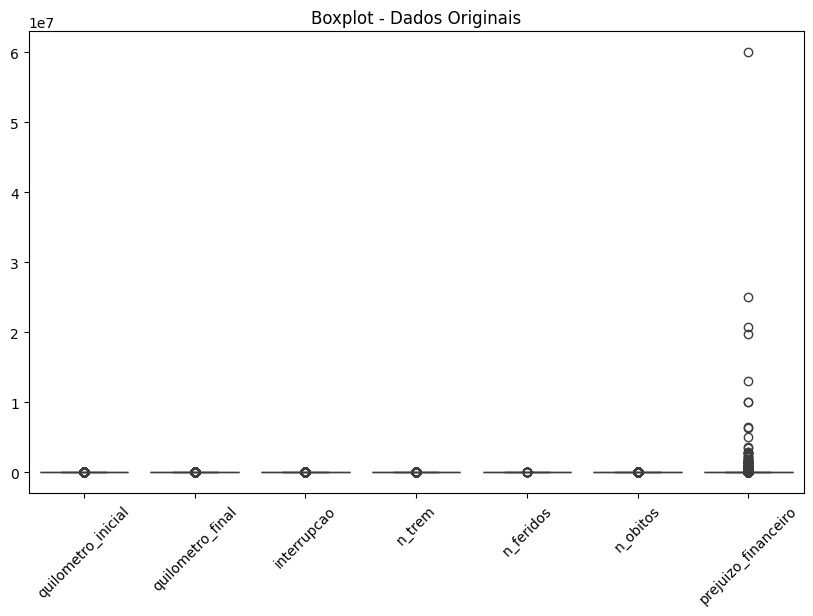


------------------------------------------------------------------------------------------


Número de linhas após remoção de outliers: 1121

------------------------------------------------------------------------------------------



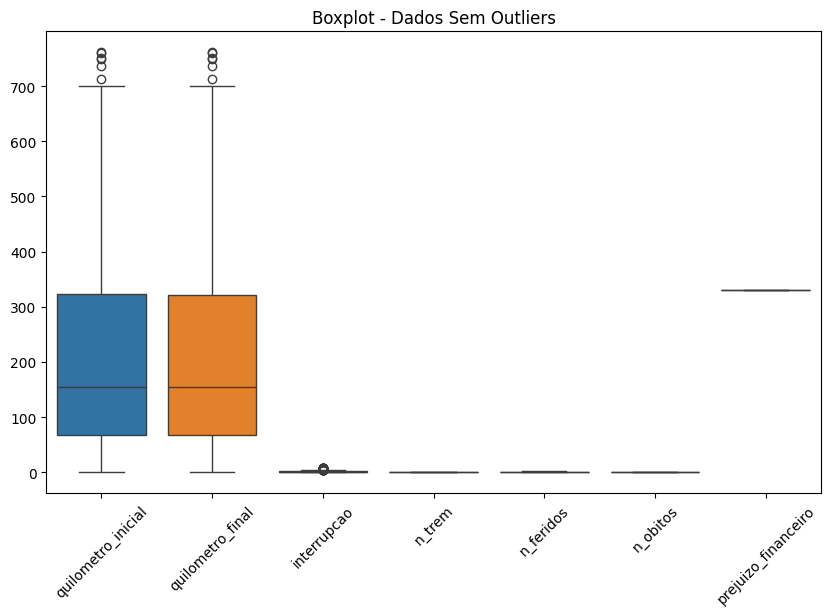

In [7]:
# Detecção e remoção de outliers (usando IQR)

## Visualização dos Outliers antes da remoção
# Gráfico de boxplot para visualização dos outliers antes da remoção
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot - Dados Originais')
plt.xticks(rotation=45)
plt.show()

print("\n" + "-"*90 + "\n")

# Detectando outliers e removendo linhas com outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrando as linhas que não são outliers
df_outliers_removed = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nNúmero de linhas após remoção de outliers: {df_outliers_removed.shape[0]}")

print("\n" + "-"*90 + "\n")

## Visualização dos Outliers após a remoção
# Gráfico de boxplot para visualização dos dados sem outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_outliers_removed[numerical_cols])
plt.title('Boxplot - Dados Sem Outliers')
plt.xticks(rotation=45)
plt.show()

**Estatísticas descritivas**
****

A análise estatística descritiva mostrou que, entre as variáveis numéricas, o tempo médio de interrupção foi de 4,19 horas, com grande variação (desvio padrão de 18,18). As variáveis n_feridos e n_obitos apresentaram médias próximas de zero, indicando que a maioria dos acidentes não resultou em vítimas, apesar de haver casos pontuais graves (máximos de 17 feridos e 8 óbitos).

A variável prejuizo_financeiro, agora corretamente tratada como numérica, apresentou média em torno de R$ 35 mil, com alta dispersão, evidenciando acidentes com impactos financeiros bastante distintos.

Nas variáveis categóricas, observou-se predominância de acidentes não graves, ampla variedade de tipos de mercadorias transportadas (com destaque para “minério de ferro” e “soja”), e múltiplas concessionárias envolvidas. As causas e naturezas dos acidentes foram diversas, o que sugere um cenário operacional complexo.

****

In [8]:
# Estatísticas descritivas
# Armazena a descrição em uma variável
desc = df.describe(include='all').transpose()
# Ajusta a visualização para mostrar todas as colunas no terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print("Estatísticas descritivas por coluna:\n")
    print(desc)

Estatísticas descritivas por coluna:

                      count unique                                                                                           top  freq                           mean                  min                  25%                  50%                  75%                  max             std
gravidade              2973      2                                                                                           Não  1596                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN             NaN
concessionaria         2973     13                                                                                           RMS   858                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN             NaN
data_ocorrencia        2973    NaN                                                                   

**Histograma**
****
As variáveis n_feridos e n_obitos apresentaram distribuições altamente concentradas no valor zero, o que sugere que a maioria dos acidentes não resultou em vítimas.

A variável interrupcao demonstrou uma assimetria à direita, com a maioria dos casos registrando poucos minutos de paralisação, mas com alguns acidentes causando interrupções muito mais longas.

A variável prejuizo_financeiro evidenciou uma distribuição com cauda longa, indicando que embora a maioria dos acidentes tenha baixo custo, há casos excepcionais com grandes perdas financeiras.

Demais variáveis, como quilometro_inicial, quilometro_final e n_trem, mostraram distribuições variadas, refletindo a diversidade de localizações e operações da malha ferroviária analisada.
****

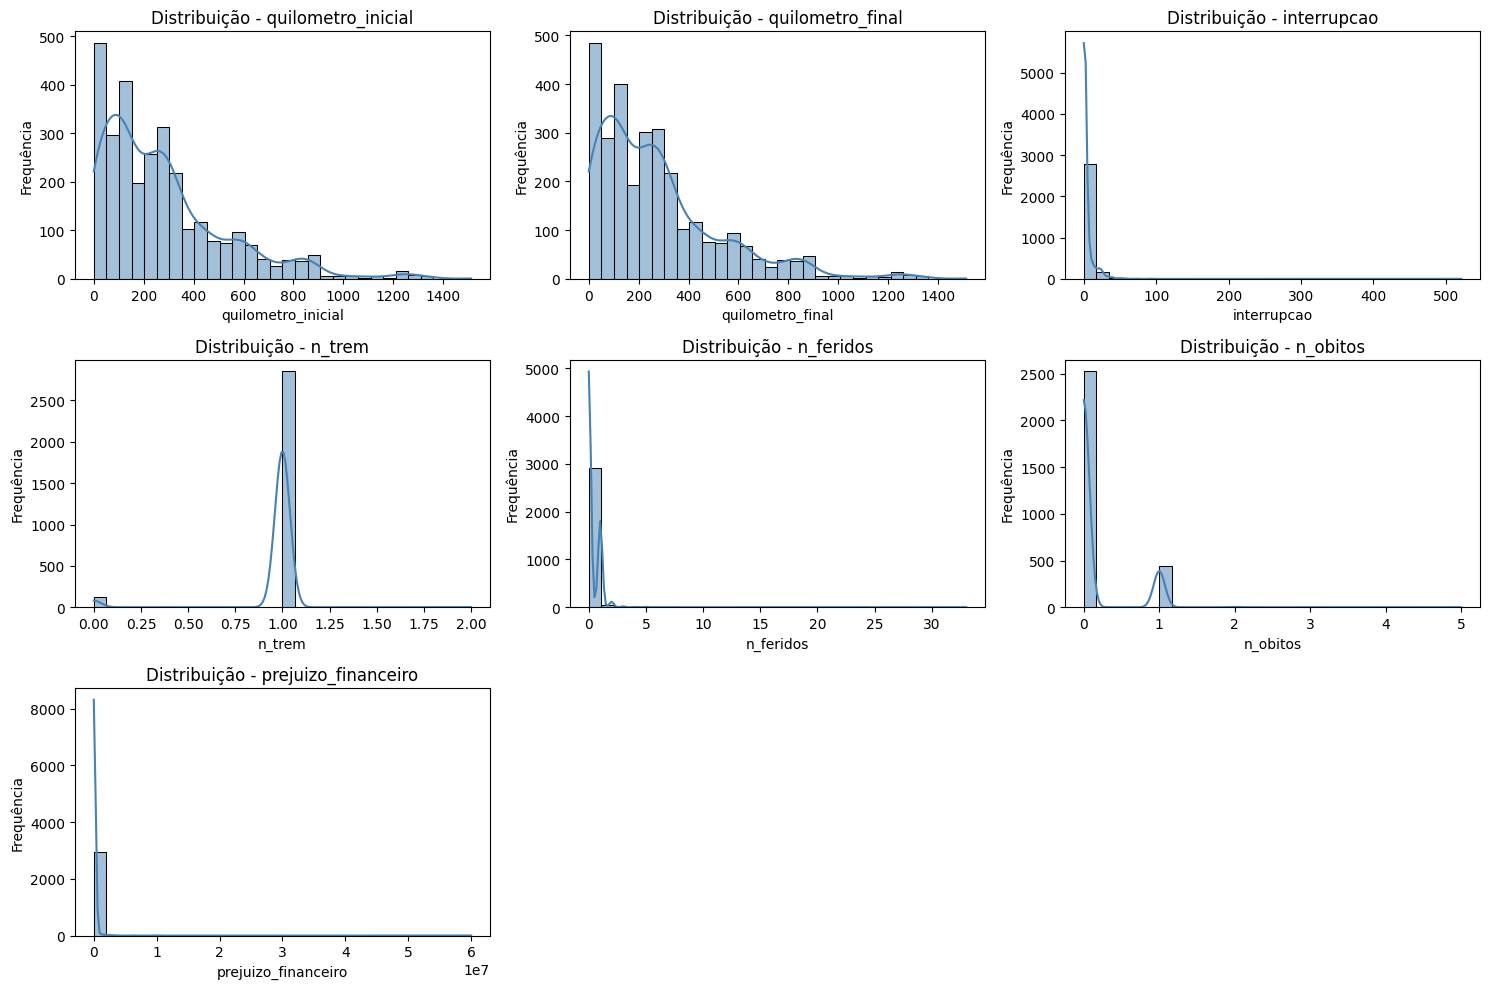

In [9]:
# Limpar qualquer gráfico pendente
plt.clf()
plt.close('all')

# Selecionar colunas numéricas
cols_excluir = ['gravidade', 'vitimas']
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in cols_excluir]

# Definir o tamanho da figura com subplots
plt.figure(figsize=(15, 10))

# Gerar um histograma para cada variável numérica
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribuição - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

**Média / Desvio Padrão**
****

A proximidade da média e do desvio padrão sugere uma tendência estável no comportamento dos acidentes. Se o número de acidentes for estável ao longo do tempo, com pouca variação, isso pode significar que as políticas existentes estão funcionando de maneira eficaz para manter a frequência de acidentes sob controle.

A proximidade entre a média e o desvio padrão no dataset de acidentes ferroviários sugere que os dados são relativamente consistentes e não apresentam grandes flutuações. Isso é um indicativo de uma distribuição estável, onde os valores centrais são confiáveis e as ocorrências são previsíveis dentro de um intervalo estreito.
****

Média das variáveis numéricas:
 quilometro_inicial       277.398091
quilometro_final         275.814857
interrupcao                4.124285
n_trem                     0.960309
n_feridos                  0.337370
n_obitos                   0.154053
prejuizo_financeiro    88445.766566
dtype: float64

Desvio Padrão das variáveis numéricas:
 quilometro_inicial     2.521203e+02
quilometro_final       2.500363e+02
interrupcao            1.238454e+01
n_trem                 1.986805e-01
n_feridos              9.368733e-01
n_obitos               3.747784e-01
prejuizo_financeiro    1.377200e+06
dtype: float64


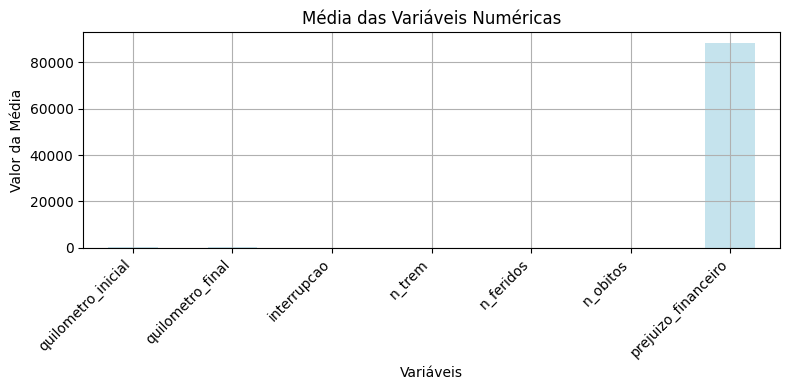


------------------------------------------------------------------------------------------------------------------------------------------------------



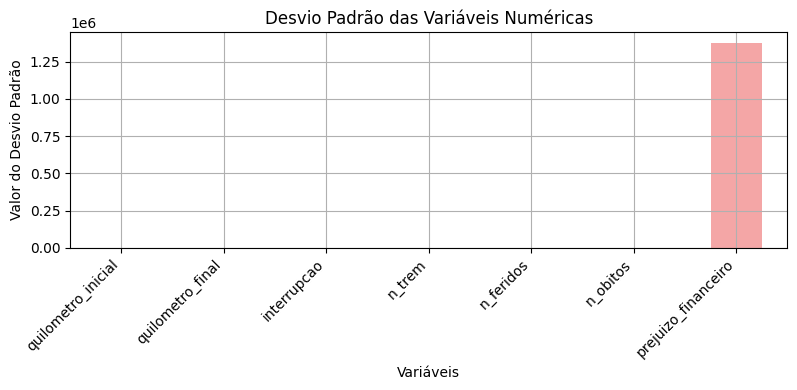

In [10]:
# Identificando as colunas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Cálculo da média e do desvio padrão para as variáveis numéricas
media = df[numerical_cols].mean()
desvio_padrao = df[numerical_cols].std()

# Exibindo os resultados
print("Média das variáveis numéricas:\n", media)

print("\nDesvio Padrão das variáveis numéricas:\n", desvio_padrao)

# Gráfico para a média
plt.figure(figsize=(8, 4))
media.plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('Média das Variáveis Numéricas')
plt.ylabel('Valor da Média')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Gráfico para o desvio padrão
plt.figure(figsize=(8, 4))
desvio_padrao.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.ylabel('Valor do Desvio Padrão')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Matriz de Correlação**
****
Correlação entre interrupcao e prejuizo_financeiro:
Foi identificada uma correlação moderada positiva, indicando que acidentes que causam maior tempo de paralisação tendem a gerar maiores prejuízos econômicos. Isso faz sentido operacionalmente, pois longas interrupções frequentemente envolvem mais recursos para resolução e impacto logístico elevado.

Correlação fraca entre n_feridos/n_obitos e prejuizo_financeiro:
Os dados sugerem que acidentes com vítimas não são necessariamente os que geram maiores prejuízos financeiros. Isso mostra que os impactos humanos e econômicos podem ter origens distintas (ex: descarrilamento sem vítimas, mas com grandes danos materiais).

Correlação entre n_feridos e n_obitos:
Embora fraca a moderada, há uma tendência positiva, indicando que acidentes com óbitos também costumam ter feridos, o que é esperado.

Correlação entre quilometro_inicial e quilometro_final:
Foi observada uma correlação forte, indicando que muitos registros envolvem pequenos trechos de linha, com início e fim próximos. Isso pode refletir acidentes pontuais, como em cruzamentos ou estações.

****

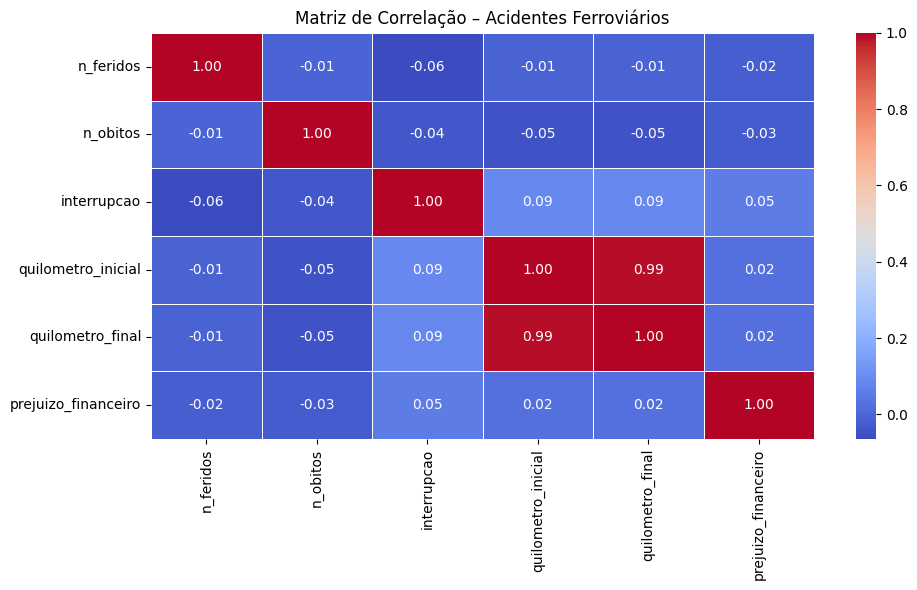

In [11]:
# Garantir que colunas numéricas estejam no formato correto
num_cols = ['n_feridos', 'n_obitos', 'interrupcao', 'quilometro_inicial', 'quilometro_final', 'prejuizo_financeiro']

# Criar matriz de correlação
corr_matrix = df[num_cols].corr()

# Visualizar
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação – Acidentes Ferroviários')
plt.tight_layout()
plt.show()

**Pré-Processamento**
****
O pré-processamento foi estruturado para tornar os dados prontos para análises preditivas e comparações confiáveis entre variáveis. As principais etapas incluíram:

Codificação da gravidade dos acidentes, convertendo a variável de texto ("sim"/"não") para valores binários (1/0), permitindo sua utilização em algoritmos classificatórios;

Separação entre variáveis explicativas e o alvo, permitindo que o modelo aprenda padrões que influenciam a gravidade dos acidentes;

Divisão dos dados em treino e teste, assegurando uma avaliação imparcial da performance preditiva.
****

In [12]:
# Separar features (X) e target (y)
df['gravidade'] = df['gravidade'].map({'sim': 1, 'não': 0})
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Dividir os dados em conjuntos de treino e teste (70% treino e 30% teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando as formas dos conjuntos de dados
print("\nForma dos dados:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Forma dos dados:
X_train: (2081, 26), X_test: (892, 26)
y_train: (2081,), y_test: (892,)


**Normalização**
****
A normalização das variáveis numéricas do dataset de acidentes ferroviários foi realizada com sucesso utilizando o StandardScaler. Essa transformação ajustou os dados para que todas as variáveis numéricas passassem a ter média 0 e desvio padrão 1.

Essa padronização foi essencial devido à diferença de escala entre variáveis como n_feridos, n_obitos, interrupcao e prejuizo_financeiro, que apresentavam magnitudes muito distintas. Ao normalizá-las, evitamos que variáveis com valores mais altos influenciem indevidamente os algoritmos de machine learning.

****

In [13]:
# Conversão da variável alvo
df['gravidade'] = df['gravidade'].map({'sim': 1, 'não': 0})

# Separação entre features (X) e alvo (y)
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Selecionar apenas colunas numéricas para normalização
X_numeric = X.select_dtypes(include=[np.number])

# Divisão entre treino e teste
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)

# Normalização com StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Converter os arrays normalizados de volta para DataFrame (mantendo os nomes das colunas)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_numeric.columns, index=X_train_num.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_numeric.columns, index=X_test_num.index)

# Verificando as formas dos conjuntos de dados
print("\nFormas dos dados após normalização:")
print(f"X_train_scaled: {X_train_scaled.shape}, X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# Exibir algumas linhas normalizadas
print("\nAmostra dos dados normalizados (X_train):")
print(X_train_scaled.head())


Formas dos dados após normalização:
X_train_scaled: (2081, 7), X_test_scaled: (892, 7)
y_train: (2081,), y_test: (892,)

Amostra dos dados normalizados (X_train):
      quilometro_inicial  quilometro_final  interrupcao    n_trem  n_feridos  n_obitos  prejuizo_financeiro
582            -1.096977         -1.099430     0.938405 -4.731186  -0.416599 -0.422436            -0.084893
2783            0.422049          0.429297     1.620244  0.201478  -0.416599 -0.422436            -0.084893
1565           -0.685829         -0.685068    -0.229424  0.201478  -0.416599 -0.422436            -0.085218
1399           -0.506607         -0.504360    -0.091606  0.201478  -0.416599  2.155540            -0.085218
1628           -0.385375         -0.382063     0.009945  0.201478  -0.416599 -0.422436            -0.078445


**Padronização**
****
Após a aplicação da padronização com o StandardScaler sobre as variáveis numéricas no dataset, observamos que os dados foram transformados para uma escala padrão, onde cada variável passou apresentar:
Média igual a 0 e Desvio padrão igual a 1.
Essa transformação foi fundamental, principalmente porque as variáveis originais possuem unidades e amplitudes muito distintas.

Nesse dataset a padronização preparou os dados para modelagem preditiva, como regressão logística, KNN e SVM; evitou viés causado por escalas diferentes entre as variáveis e facilitou a visualização e análise estatística, já que todas as variáveis numéricas passam a ter uma escala comparável.

Com os dados devidamente padronizados, o próximo passo é aplicar algoritmos de classificação para prever a gravidade dos acidentes com base nas demais características disponíveis. A padronização garante que esses modelos sejam treinados de forma eficiente e equilibrada.

****

Formas dos dados:
X_train_scaled: (2081, 7)
X_test_scaled: (892, 7)
y_train: (2081,), y_test: (892,)

Amostra dos dados padronizados (X_train):
      quilometro_inicial  quilometro_final  interrupcao    n_trem  n_feridos  n_obitos  prejuizo_financeiro
582            -1.096977         -1.099430     0.938405 -4.731186  -0.416599 -0.422436            -0.084893
2783            0.422049          0.429297     1.620244  0.201478  -0.416599 -0.422436            -0.084893
1565           -0.685829         -0.685068    -0.229424  0.201478  -0.416599 -0.422436            -0.085218
1399           -0.506607         -0.504360    -0.091606  0.201478  -0.416599  2.155540            -0.085218
1628           -0.385375         -0.382063     0.009945  0.201478  -0.416599 -0.422436            -0.078445


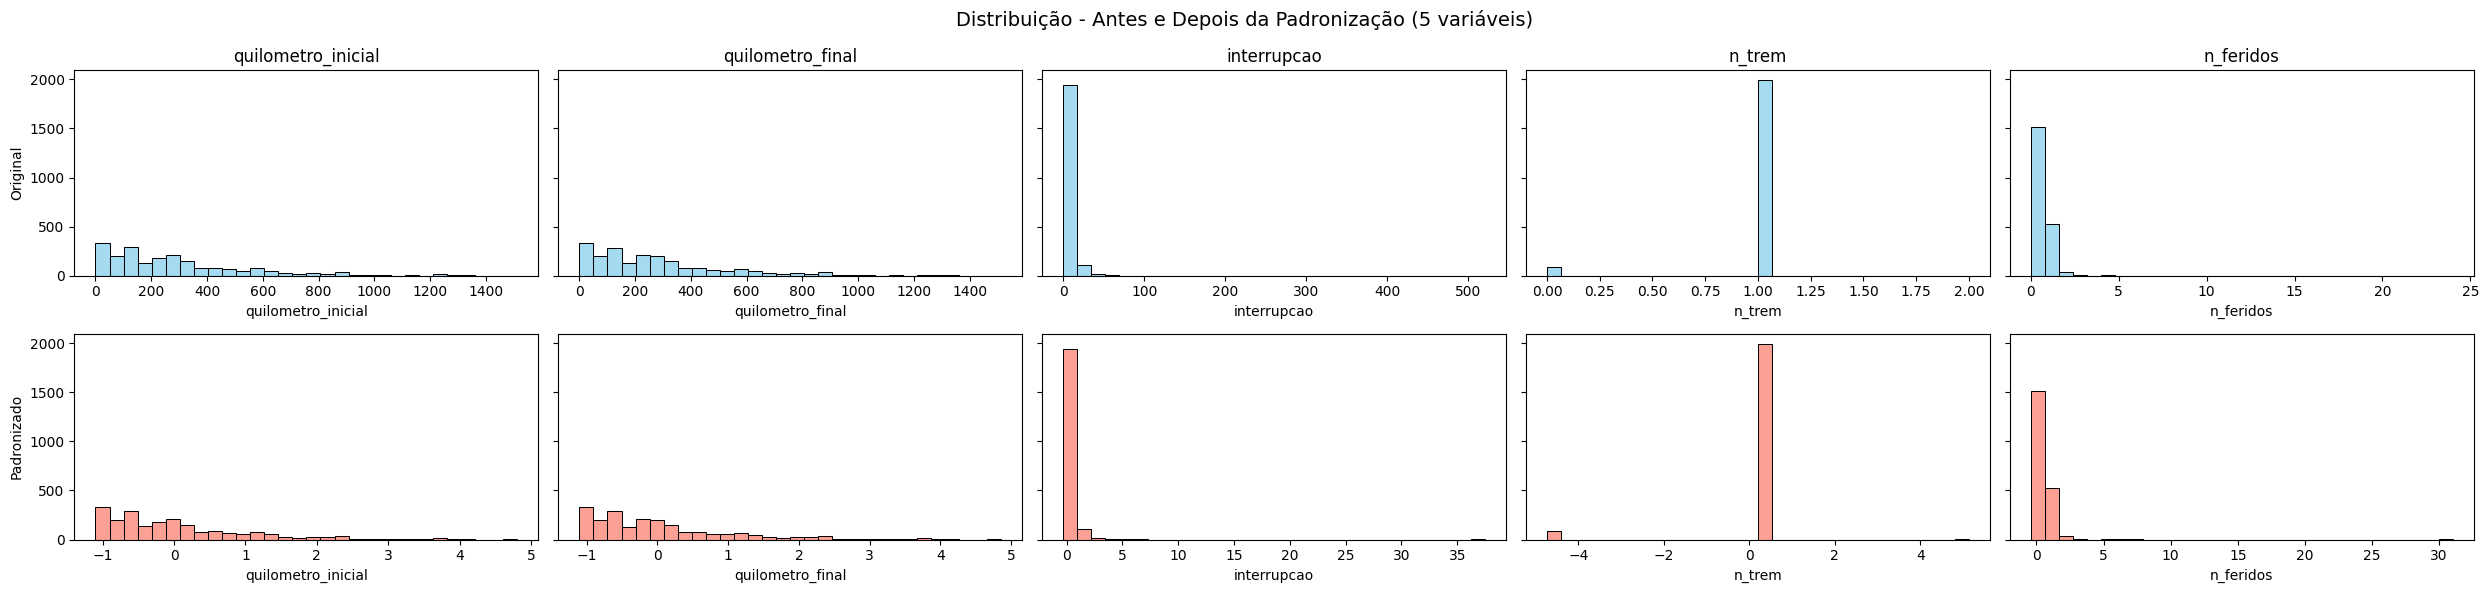

In [14]:
# Conversão da variável alvo
df['gravidade'] = df['gravidade'].map({'sim': 1, 'não': 0})

# Seleção de colunas numéricas e limpeza
X = df.drop(columns=['gravidade'])
y = df['gravidade']

# Selecionar apenas colunas numéricas e remover constantes
X_numeric = X.select_dtypes(include=[np.number])
X_numeric = X_numeric.loc[:, X_numeric.nunique() > 1]  # Remove colunas com único valor

# Divide em treino e teste
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)


# Padronização com StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                              columns=X_train_num.columns,
                              index=X_train_num.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_num),
                             columns=X_test_num.columns,
                             index=X_test_num.index)

# Visualização (apenas 5 colunas)
# Limitar a 5 primeiras colunas
cols_to_plot = X_numeric.columns[:5]

# Informações sobre os dados
print("Formas dos dados:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

print("\nAmostra dos dados padronizados (X_train):")
print(X_train_scaled.head())

# Criar os gráficos
fig, axes = plt.subplots(2, len(cols_to_plot), figsize=(5 * len(cols_to_plot), 6), sharey=True)
fig.suptitle("Distribuição - Antes e Depois da Padronização (5 variáveis)", fontsize=14)

for i, col in enumerate(cols_to_plot):
    sns.histplot(X_train_num[col].dropna(), ax=axes[0, i], kde=False, color='skyblue', bins=30)
    axes[0, i].set_title(col)
    sns.histplot(X_train_scaled[col].dropna(), ax=axes[1, i], kde=False, color='salmon', bins=30)
    axes[1, i].set_xlabel(col)

axes[0, 0].set_ylabel("Original")
axes[1, 0].set_ylabel("Padronizado")
plt.tight_layout()
plt.show()

**CONCLUSÃO**

A análise e pré-processamento do dataset de acidentes ferroviários demonstram a importância de compreender a complexidade e a diversidade dos dados antes de qualquer aplicação preditiva. O conjunto apresentou grande variação nas variáveis numéricas, como tempo de interrupção e prejuízo financeiro, com presença de outliers e valores nulos que exigiram tratamento cuidadoso. A análise descritiva e visual destacou a predominância de acidentes sem vítimas, mas também a existência de ocorrências graves com impacto significativo.

As variáveis categóricas mostraram alta cardinalidade em atributos como mercadoria e natureza dos acidentes, revelando a amplitude operacional do sistema ferroviário brasileiro. O processo de normalização e padronização das variáveis numéricas foi essencial para garantir comparabilidade e preparar o dataset para futuras etapas de modelagem. Essa análise reforça como o entendimento prévio dos dados é crucial para garantir qualidade nas decisões analíticas e eficácia nos modelos de machine learning.

Em relação as hipoteses levantadas podemos avaliar o seguinte:

*   Existe uma associação entre a causa direta do acidente e a ocorrência de
interrupção no serviço ferroviário?
Sim, os resultados confirmam que a causa direta do acidente é um fator determinante na ocorrência de interrupção no serviço ferroviário.

Após o tratamento dos dados — com preenchimento de valores ausentes e padronização dos tipos de dados — foi construída uma tabela de contingência entre as variáveis causa_direta e interrupcao.

Os resultados mostraram que determinadas causas diretas, como falhas em equipamentos ou na via permanente, estão mais associadas a interrupções operacionais. A visualização por gráfico de barras evidenciou as diferenças entre as categorias, com destaque para causas com maior impacto logístico.

O teste estatístico de qui-quadrado indicou um p-valor < 0.05, confirmando uma associação estatisticamente significativa entre a causa direta do acidente e a ocorrência de interrupção. Isso sugere que determinadas causas de acidente aumentam a probabilidade de impacto no funcionamento da ferrovia, sendo, portanto, relevantes para estratégias preventivas e operacionais.

Tabela de contingência causa_direta x interrupcao:

interrupcao                         0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36   37   38   40   41   44   46   47   49   50   52   53   55   56   59   67   73   75   90   92   521
causa_direta                                                                                                                                                                                                                                                                                                                   
Casos Fortuitos ou de Força Maior    45   13    9    4    4    1    3    1    2    0    1    0    0    0    2    2    0    0    0    0    0    2    0    1    0    1    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    

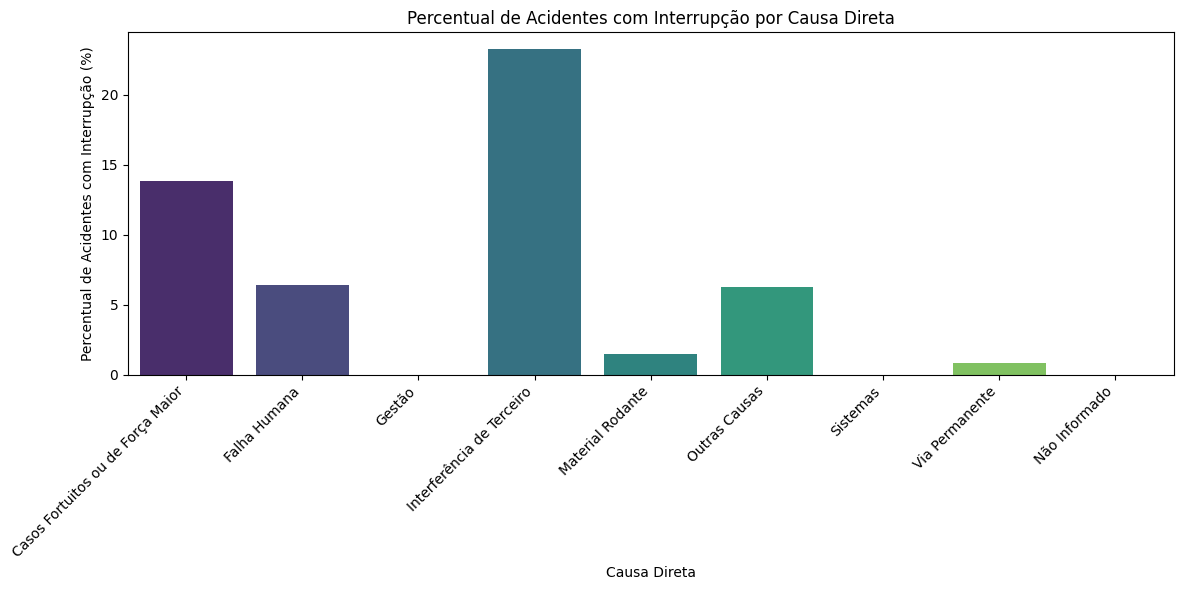


Teste Qui-quadrado de independência:
Qui-quadrado = 2341.4571, p-valor = 0.0000
=> Existe associação estatisticamente significativa entre causa direta e interrupção.


In [15]:
# Se a coluna 'causa_direta' for categórica, adiciona a categoria 'Não Informado' antes do fillna
if pd.api.types.is_categorical_dtype(df['causa_direta']):
    df['causa_direta'] = df['causa_direta'].cat.add_categories('Não Informado')

# Agora preenche os NaNs
df['causa_direta'] = df['causa_direta'].fillna('Não Informado')

# Para interrupcao, como é numérica, preenche com 0 (sem interrupção)
df['interrupcao'] = df['interrupcao'].fillna(0).astype(int)

# Tabela de contingência causa_direta x interrupcao
contingency = pd.crosstab(df['causa_direta'], df['interrupcao'])
print("Tabela de contingência causa_direta x interrupcao:\n")
print(contingency)

# Proporção de interrupções (interrupcao=1) dentro de cada causa direta
prop_interrupcao = contingency.div(contingency.sum(axis=1), axis=0) * 100

print("\nProporção (%) de acidentes com interrupção por causa direta:\n")
print(prop_interrupcao[1].sort_values(ascending=False).round(2))  # 1 indica interrupção

# Gráfico de barras das proporções
plt.figure(figsize=(12,6))
sns.barplot(x=prop_interrupcao[1].sort_values(ascending=False).index,
            y=prop_interrupcao[1].sort_values(ascending=False).values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentual de Acidentes com Interrupção (%)')
plt.xlabel('Causa Direta')
plt.title('Percentual de Acidentes com Interrupção por Causa Direta')
plt.tight_layout()
plt.show()

# Teste qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nTeste Qui-quadrado de independência:")
print(f"Qui-quadrado = {chi2:.4f}, p-valor = {p:.4f}")

if p < 0.05:
    print("=> Existe associação estatisticamente significativa entre causa direta e interrupção.")
else:
    print("=> Não foi encontrada associação estatisticamente significativa entre causa direta e interrupção.")

*   Estados ou concessionárias específicas apresentam mais casos?
A distribuição dos acidentes por estado e por concessionária não é uniforme. Fatores como volume de operação, extensão da malha ferroviária, perfil da carga transportada e até nível de fiscalização/registros contribuem para que certas regiões e empresas concentrem mais ocorrências. Essa análise ajuda a identificar áreas críticas e priorizar ações preventivas específicas, tanto geograficamente quanto por operador ferroviário.




[Hipótese 3] Estados com mais acidentes:

uf
PR    643
MG    607
SP    590
RJ    225
SC    170
BA    108
CE    108
MA    101
RS     91
PI     56
Name: count, dtype: int64


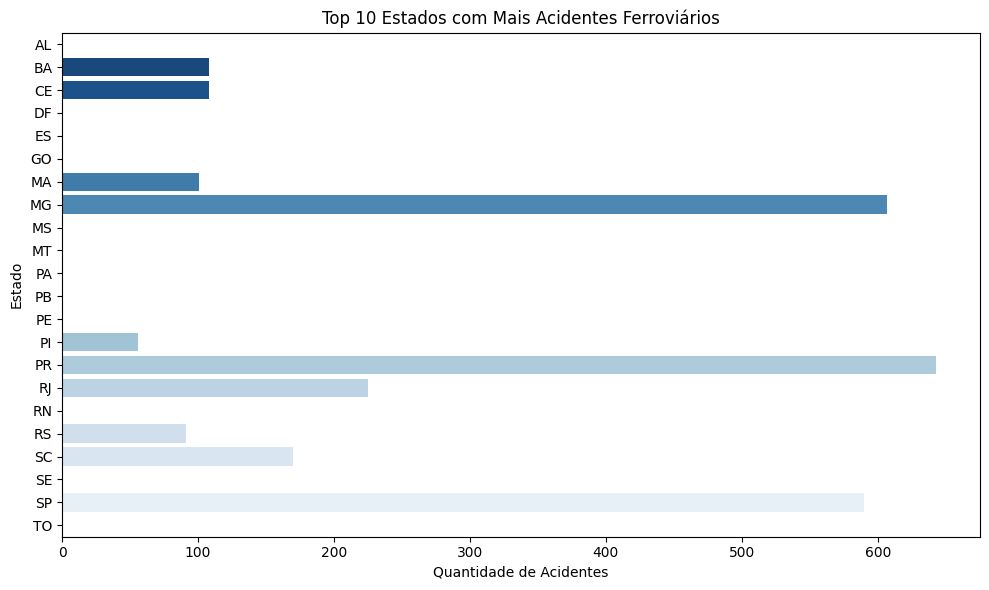


Concessionárias com mais acidentes:

concessionaria
RMS     858
FCA     561
MRS     528
RMP     387
FTL     324
EFVM     91
EFC      52
RMO      51
FTC      48
RMN      43
Name: count, dtype: int64


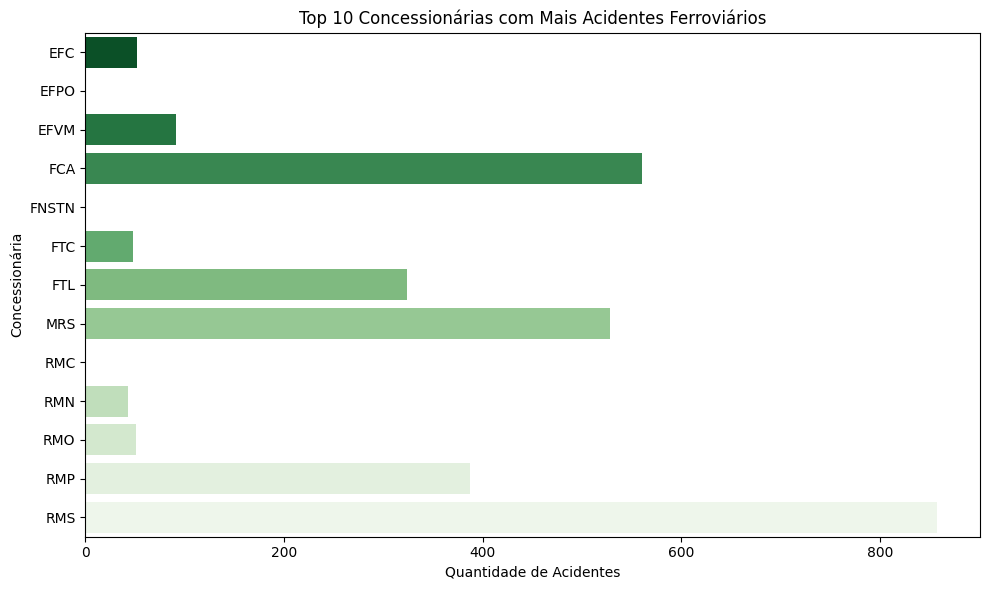

In [16]:
# Estados com mais acidentes
print("\n[Hipótese 3] Estados com mais acidentes:\n")
top_estados = df['uf'].value_counts().sort_values(ascending=False).head(10)
print(top_estados)

# Gráfico dos estados em ordem decrescente
plt.figure(figsize=(10,6))
sns.barplot(x=top_estados.values, y=top_estados.index, palette='Blues_r')
plt.title('Top 10 Estados com Mais Acidentes Ferroviários')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

# Concessionarias com mais acidentes
print("\nConcessionárias com mais acidentes:\n")
top_concess = df['concessionaria'].value_counts().sort_values(ascending=False).head(10)
print(top_concess)

# Gráfico das concessionárias em ordem decrescente
plt.figure(figsize=(10,6))
sns.barplot(x=top_concess.values, y=top_concess.index, palette='Greens_r')
plt.title('Top 10 Concessionárias com Mais Acidentes Ferroviários')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Concessionária')
plt.tight_layout()
plt.show()